In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
import plotly.express as px

## Performing Sentiment Analysis 

In [72]:
comments = pd.read_csv('C:/Data_Fajar/Data_Analytics_Projects_2/GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [73]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [74]:
#!pip install textblob

In [75]:
from textblob import TextBlob

In [76]:
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.polarity

0.45000000000000007

In [77]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [78]:
comments.dropna(inplace=True)

In [79]:
polarity = []

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [80]:
comments['polarity'] = polarity

In [81]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

## Wordcloud representation of Sentiments

### Positive Comments

In [82]:
comments_positive = comments[comments['polarity'] == 1]

In [83]:
comments_positive.shape

(20400, 5)

In [84]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [85]:
from wordcloud import WordCloud, STOPWORDS

In [86]:
stopwords = set(STOPWORDS)

In [87]:
total_comment = ''.join(comments_positive['comment_text'])

In [88]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

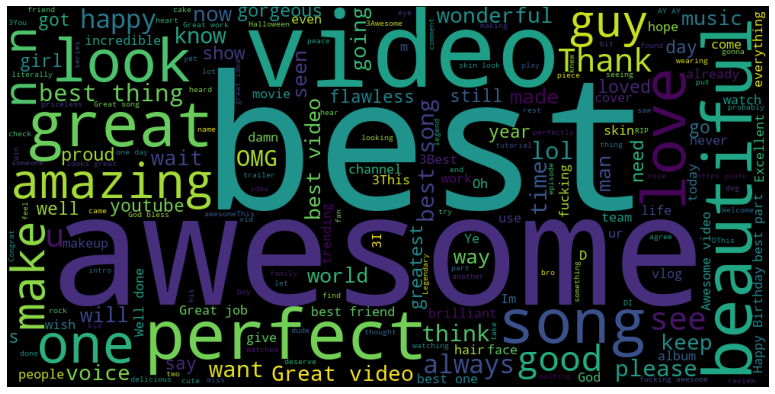

In [89]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud)
plt.axis('off')

### Negative Comments

In [90]:
comments_negative = comments[comments['polarity'] == -1]

In [91]:
total_comment2 = ''.join(comments_negative['comment_text'])

In [92]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comment2)

(-0.5, 999.5, 499.5, -0.5)

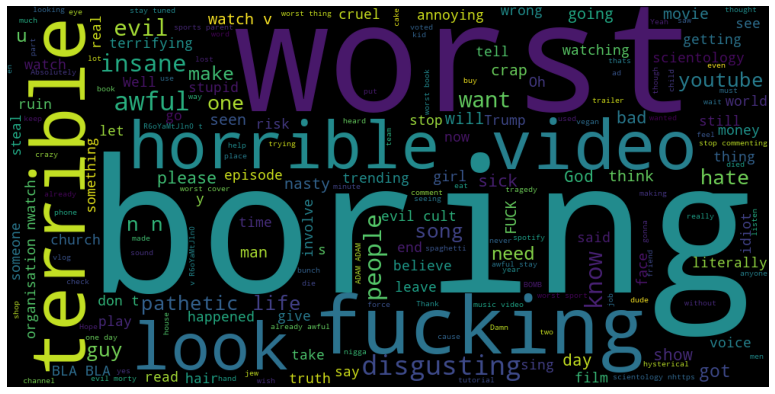

In [93]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud2)
plt.axis('off')

## Analyze Trending Tags and Views of Youtube

In [94]:
videos = pd.read_csv('C:/Data_Fajar/Data_Analytics_Projects_2/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [95]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [96]:
tags_complete = ' '.join(videos['tags'])

In [97]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [98]:
import re

In [99]:
tags = re.sub('[^a-zA-Z]', ' ', tags_complete)

In [100]:
tags
#eliminate extra spacing

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [101]:
tags = re.sub(' +', ' ', tags)

In [102]:
wordcloud3 = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

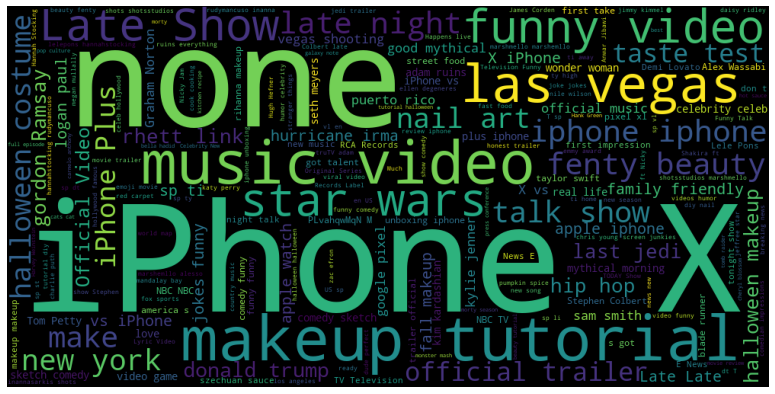

In [103]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud3)
plt.axis('off')

### Perform Analysis on likes, view & Dislike & How they correlate to each others

In [104]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

Text(0.5, 1.0, 'Regression plot for views & likes')

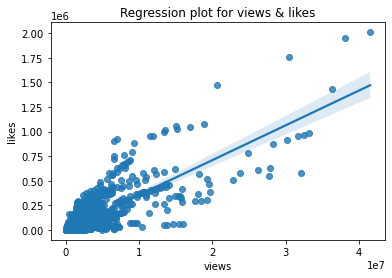

In [105]:
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

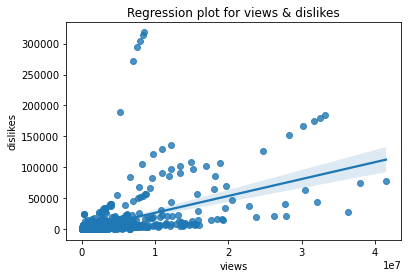

In [106]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression plot for views & dislikes')

In [107]:
df_corr = videos[['views', 'likes', 'dislikes']]

In [108]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

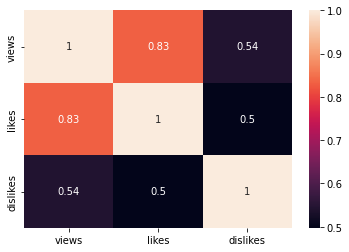

In [109]:
sns.heatmap(df_corr.corr(), annot=True)

## Perform Emoji Analysis

In [110]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [111]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [112]:
print('\U0001F600')

😀


In [113]:
#!pip install emoji

In [114]:
import emoji

In [115]:
comment = comments['comment_text'][1]

In [116]:
comment

'To be there with a samsung phone\\n😂😂😂'

In [120]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

['😂', '😂', '😂']

In [121]:
str=''
for i in comments['comment_text']:
    list = [c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
    for ele in list:
        str = str+ele

In [122]:
len(str)

333278

In [125]:
#top 20 emoji
result = {}
for i in set(str):
    result[i] = str.count(i)

In [127]:
result

{'🔅': 39,
 '®': 53,
 '⁉': 19,
 '📢': 27,
 '🚤': 7,
 '📱': 226,
 '🎍': 17,
 '🐁': 31,
 '🍳': 38,
 '💃': 226,
 '🤹': 1,
 '⛳': 10,
 '🔞': 20,
 '⚓': 11,
 '🌯': 74,
 '🎎': 8,
 '🍨': 20,
 '👞': 34,
 '🚉': 5,
 '🦐': 4,
 '🥖': 3,
 '🧒': 2,
 '🙄': 765,
 '🈁': 5,
 '⭕': 18,
 '🕸': 22,
 '➿': 5,
 '🔁': 5,
 '👫': 58,
 '🍀': 68,
 '🌊': 158,
 '〰': 295,
 '🈯': 5,
 '😔': 662,
 '✋': 149,
 '☎': 14,
 '🗣': 65,
 '◽': 5,
 '👭': 75,
 '🔈': 7,
 '㊗': 6,
 '🕑': 7,
 '↔': 5,
 '⛄': 7,
 '☹': 194,
 '🔠': 5,
 '⛏': 5,
 '🐒': 43,
 '☀': 96,
 '📄': 9,
 '🏪': 7,
 '⬜': 141,
 '🚣': 7,
 '🌷': 97,
 '😃': 1327,
 '🐺': 125,
 '🚲': 14,
 '📓': 21,
 '🤤': 446,
 '🕊': 35,
 '🍗': 630,
 '📮': 9,
 '🐠': 45,
 '🐞': 100,
 '🏉': 16,
 '❤': 36780,
 '🔺': 20,
 '✏': 21,
 '🚇': 6,
 '🔥': 10249,
 '🌹': 750,
 '🍅': 30,
 '⛅': 18,
 '👷': 28,
 '🌲': 26,
 '📘': 12,
 '♋': 15,
 '⚒': 5,
 '📷': 34,
 '☝': 187,
 '🌶': 45,
 '🤳': 239,
 '🐚': 20,
 '⚛': 8,
 '🏞': 8,
 '📟': 11,
 '😵': 260,
 '㊙': 5,
 '🙁': 210,
 '🚘': 10,
 '🚷': 11,
 '👵': 26,
 '🗃': 5,
 '💞': 1393,
 '🎉': 833,
 '😉': 1153,
 '😘': 6334,
 '🍞': 19,
 '🧞': 6,
 '⏪': 1

In [128]:
result.items()

dict_items([('🔅', 39), ('®', 53), ('⁉', 19), ('📢', 27), ('🚤', 7), ('📱', 226), ('🎍', 17), ('🐁', 31), ('🍳', 38), ('💃', 226), ('🤹', 1), ('⛳', 10), ('🔞', 20), ('⚓', 11), ('🌯', 74), ('🎎', 8), ('🍨', 20), ('👞', 34), ('🚉', 5), ('🦐', 4), ('🥖', 3), ('🧒', 2), ('🙄', 765), ('🈁', 5), ('⭕', 18), ('🕸', 22), ('➿', 5), ('🔁', 5), ('👫', 58), ('🍀', 68), ('🌊', 158), ('〰', 295), ('🈯', 5), ('😔', 662), ('✋', 149), ('☎', 14), ('🗣', 65), ('◽', 5), ('👭', 75), ('🔈', 7), ('㊗', 6), ('🕑', 7), ('↔', 5), ('⛄', 7), ('☹', 194), ('🔠', 5), ('⛏', 5), ('🐒', 43), ('☀', 96), ('📄', 9), ('🏪', 7), ('⬜', 141), ('🚣', 7), ('🌷', 97), ('😃', 1327), ('🐺', 125), ('🚲', 14), ('📓', 21), ('🤤', 446), ('🕊', 35), ('🍗', 630), ('📮', 9), ('🐠', 45), ('🐞', 100), ('🏉', 16), ('❤', 36780), ('🔺', 20), ('✏', 21), ('🚇', 6), ('🔥', 10249), ('🌹', 750), ('🍅', 30), ('⛅', 18), ('👷', 28), ('🌲', 26), ('📘', 12), ('♋', 15), ('⚒', 5), ('📷', 34), ('☝', 187), ('🌶', 45), ('🤳', 239), ('🐚', 20), ('⚛', 8), ('🏞', 8), ('📟', 11), ('😵', 260), ('㊙', 5), ('🙁', 210), ('🚘', 10), 

In [129]:
final = {}
for key, value in sorted(result.items(), key = lambda item:item[1]):
    final[key] = value

In [131]:
keys = [*final.keys()]

In [132]:
keys

['🤹',
 '🥨',
 '🤟',
 '🛒',
 '🥜',
 '🦏',
 '🥟',
 '🧠',
 '🤺',
 '🧣',
 '🤾',
 '🤽',
 '🧤',
 '🛷',
 '🦓',
 '🥌',
 '🥡',
 '🥚',
 '🧒',
 '🦕',
 '🧡',
 '🦔',
 '🎌',
 '🦖',
 '🧛',
 '🧢',
 '🤱',
 '🥅',
 '🧝',
 '🧘',
 '🥖',
 '🤫',
 '🧐',
 '🤨',
 '🥄',
 '🤯',
 '🦐',
 '⏏',
 '🖇',
 '⏯',
 '🛢',
 '♟',
 '⚗',
 '⏸',
 '🗓',
 '♾',
 '☦',
 '🛣',
 '🤬',
 '⚙',
 '💹',
 '🤵',
 '⏲',
 '🗄',
 '🏌',
 '⏹',
 '☸',
 '⚧',
 '🦆',
 '🥞',
 '🥈',
 '🧟',
 '🥝',
 '🏷',
 '🖍',
 '🛬',
 '🦍',
 '🗂',
 '🚉',
 '🈁',
 '➿',
 '🔁',
 '🈯',
 '◽',
 '↔',
 '🔠',
 '⛏',
 '⚒',
 '㊙',
 '🗃',
 '🎐',
 '🔣',
 '🖼',
 '🆎',
 '🈹',
 '♠',
 '🥉',
 '🤮',
 '🔃',
 '🔢',
 '🧖',
 '🖊',
 '🈵',
 '🔤',
 '⌨',
 '↖',
 '🌫',
 '🗳',
 '🕹',
 '🗜',
 '🚎',
 '🈴',
 '✡',
 '🥛',
 '🏮',
 '♦',
 '🚻',
 '🔖',
 '🖨',
 '↪',
 '🔡',
 '🚠',
 'Ⓜ',
 '◻',
 '↕',
 '⛩',
 '🦒',
 '🈂',
 '🗞',
 '⛴',
 '🛂',
 '🛋',
 '⏺',
 '⛱',
 '🈳',
 '↩',
 '🛥',
 '🔄',
 '🔲',
 '🔚',
 '❎',
 '🧜',
 '🔳',
 '🛤',
 '🚟',
 '🚛',
 '🔂',
 '🕎',
 '🗒',
 '🆔',
 '⛸',
 '☂',
 '🚁',
 '🈲',
 '🔼',
 '🖲',
 '🆖',
 '⚾',
 'ℹ',
 '㊗',
 '🚇',
 '🧞',
 '⏱',
 '🏓',
 '🥘',
 '🏧',
 '🏩',
 '🏤',
 '🛑',
 '🦇',
 '🛄',
 '⏮',
 '🏚',
 '🌉',
 '🚯',
 '🚐',
 '♻'

In [133]:
values = [*final.values()]

In [134]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [135]:
df = pd.DataFrame({'chars':keys[-20:], 'num':values[-20:]})

In [136]:
df.head()

chars   num
0     🙌  2734
1     🏼  2961
2     💙  2968
3     💗  3071
4     👌  3534

In [137]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [138]:
trace = go.Bar(x=df['chars'], y=df['num'])
iplot([trace])